# Week 1

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
data=pd.read_csv("health care diabetes.csv")

In [57]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
data.shape

(768, 9)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [60]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [61]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

here zero value in Pregnancies indicate that patient did not remain pregnant, so it is not a null value.

In [62]:
df=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Histogram without treating null values(zeros)

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>]],
      dtype=object)

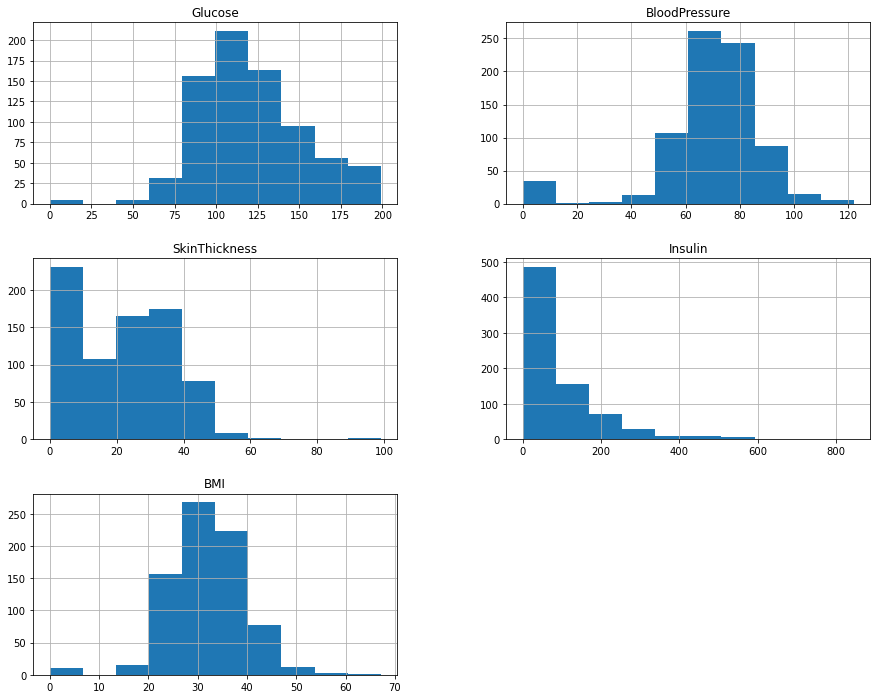

In [63]:
df.hist(figsize=(15,12))

As null values from columns 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' are nothing but zeros. Let's replace these zeros with median of that column 

In [64]:
data.Glucose=data.Glucose.replace(0,data.Glucose.median())
data.BloodPressure=data.BloodPressure.replace(0,data.BloodPressure.median())
data.SkinThickness=data.SkinThickness.replace(0,data.SkinThickness.median())
data.Insulin=data.Insulin.replace(0,data.Insulin.median())
data.BMI=data.BMI.replace(0,data.BMI.median())

In [65]:
df=data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

Histogram after treating null values(zeros)

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>],
       [<AxesSubplot:title={'center':'BMI'}>, <AxesSubplot:>]],
      dtype=object)

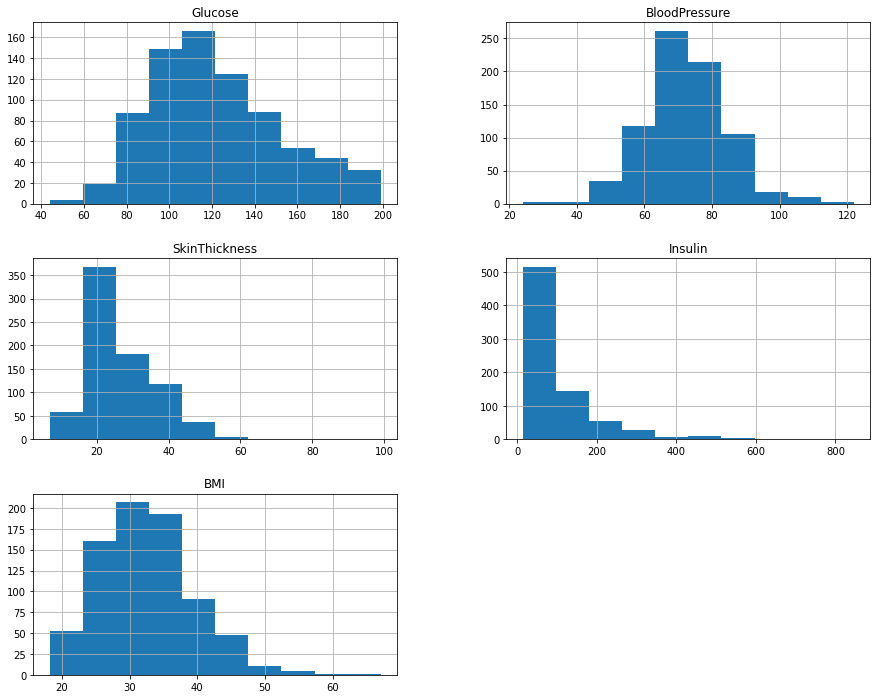

In [66]:
df.hist(figsize=(15,12))

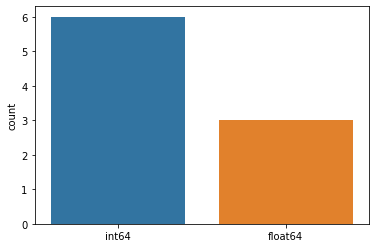

In [67]:
sns.countplot(data.dtypes.map(str))
plt.show()

# Week 2

In [68]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

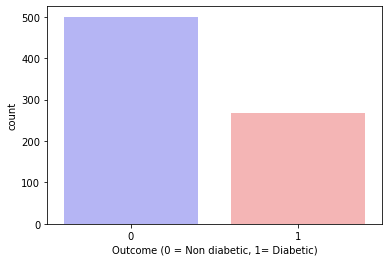

In [69]:
#data.Outcome.value_counts().plot(kind='bar')
sns.countplot(x="Outcome", data=data, palette="bwr")
plt.xlabel("Outcome (0 = Non diabetic, 1= Diabetic)")
plt.show()

We can see that both class is balanced so we need not to perform any sampling method to maintain the balance between both classes.

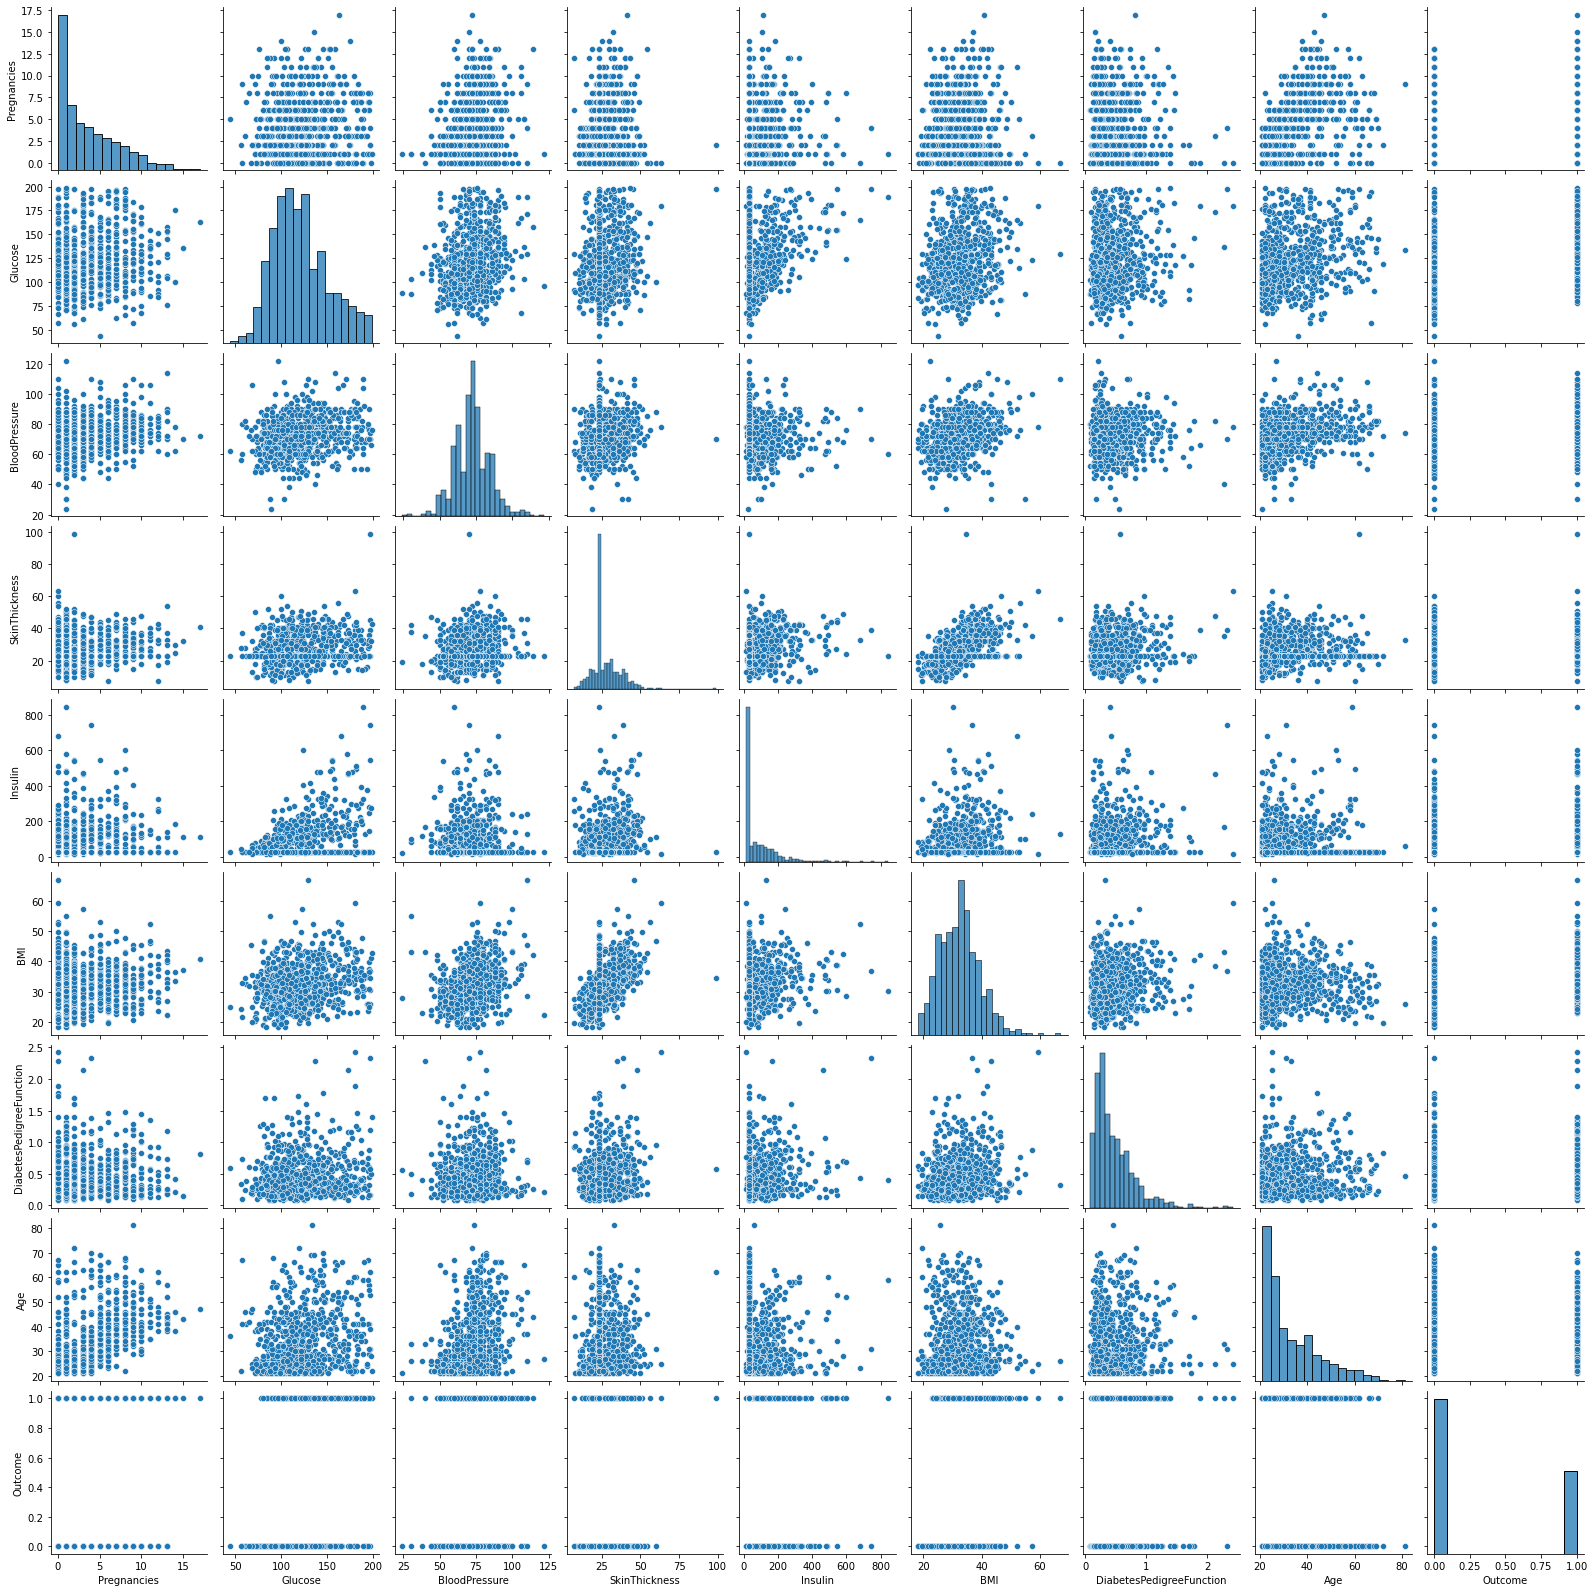

In [70]:
sns.pairplot(data)

We can see from scatter plot that there is no strong multicolinearity among features. But it looks like there is small chance of positive correlation. Let's explore by corr function.

In [71]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<AxesSubplot:>

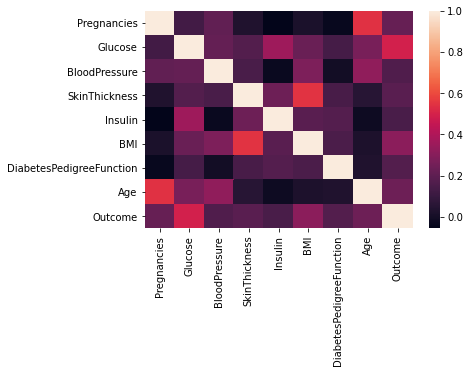

In [72]:
sns.heatmap(data.corr())

From heatmap we can say that between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation

# Week 3

# Data Preprocessing

In [73]:
x=data.drop(['Outcome'],axis=1)

In [74]:
y=data.Outcome.values

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

In [79]:
from sklearn import metrics

In [80]:
metrics.accuracy_score(y_test,knn_pred)

0.8376623376623377

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
print(metrics.classification_report(y_test,knn_pred),'\n')

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       107
           1       0.76      0.68      0.72        47

    accuracy                           0.84       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.83      0.84      0.83       154
 



In [83]:
print(confusion_matrix(y_test, knn_pred))

[[97 10]
 [15 32]]


In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_score for KNN:  0.8760190892821634


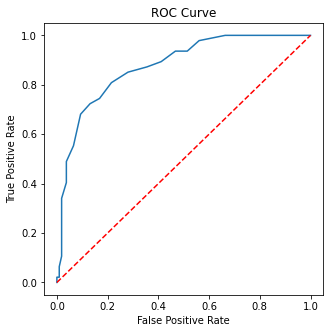

In [85]:
y_score = knn_model.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC-AUC Score

The probabilistic interpretation of ROC-AUC score is that if you randomly choose a positive case and a negative case, the probability that the positive case outranks the negative case according to the classifier is given by the AUC. 
Mathematically, it is calculated by area under curve of sensitivity (TPR) vs. FPR(1-specificity). Ideally, we would like to have high sensitivity & high specificity, but in real-world scenarios, there is always a tradeoff between sensitivity & specificity.

ROC curve can efficiently give us the score that how our model is performing in classifing the labels. We can also plot graph between False Positive Rate and True Positive Rate with this ROC(Receiving Operating Characteristic) curve. The area under the ROC curve give is also a metric. Greater the area means better the performance. 

# Support Vectore Classifier

In [86]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(x_train_std,y_train)
svc_pred=svc_model_linear.predict(x_test_std)

In [87]:
metrics.accuracy_score(y_test,svc_pred)

0.8051948051948052

In [88]:
print(metrics.classification_report(y_test,svc_pred),'\n')

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       107
           1       0.74      0.55      0.63        47

    accuracy                           0.81       154
   macro avg       0.78      0.73      0.75       154
weighted avg       0.80      0.81      0.80       154
 



In [89]:
print(confusion_matrix(y_test, svc_pred))

[[98  9]
 [21 26]]


roc_auc_score for SVC:  0.8798965997216146


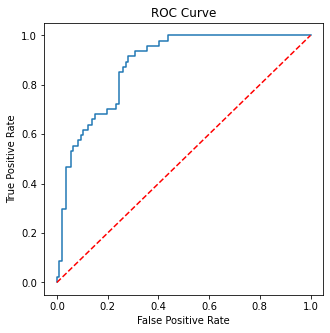

In [90]:
y_score = svc_model_linear.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for SVC: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

In [92]:
metrics.accuracy_score(y_test,lr_pred)

0.8116883116883117

In [93]:
print(metrics.classification_report(y_test,lr_pred),'\n')

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.78      0.53      0.63        47

    accuracy                           0.81       154
   macro avg       0.80      0.73      0.75       154
weighted avg       0.81      0.81      0.80       154
 



In [94]:
print(confusion_matrix(y_test, lr_pred))

[[100   7]
 [ 22  25]]


roc_auc_score for Logistic Regression:  0.8791012129648041


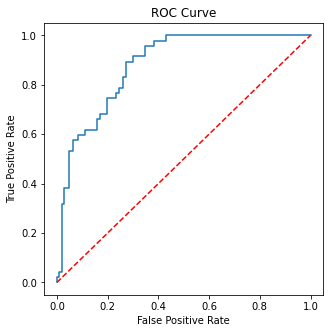

In [95]:
y_score = lr_model.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Ensemble Learning(RF)

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

In [97]:
metrics.accuracy_score(y_test,rf_pred)

0.8051948051948052

In [98]:
print(metrics.classification_report(y_test,rf_pred),'\n')

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154
 



In [99]:
print(confusion_matrix(y_test, rf_pred))

[[94 13]
 [17 30]]


roc_auc_score for Logistic Regression:  0.8702525352952873


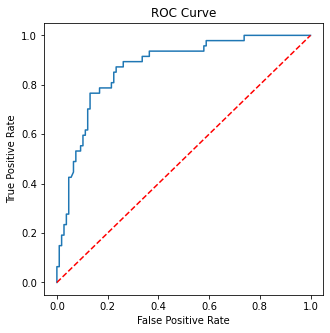

In [100]:
y_score = rf_model.predict_proba(x_test_std)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

plt.subplots(1, figsize=(5,5))
plt.plot(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,false_positive_rate,'r--',color='red')
plt.title("ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

So we can see Random Forest Classifier is best among all, as it has better auc score and also i am considering it to be best because balance of classes between Precision and Recall is far better than other Models. 

In [101]:
data.to_excel('analysed health care diabetes.xlsx',index=False)